This notebook is used to investigate pvalues with LA and LV EF.

Jan 2023: Corrected formula used for calculating LA emptying fraction (LAEF)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [7]:
numTimes = 10
nTime=np.arange(0, numTimes)/numTimes

# DataPath="/home/csi20local/Dropbox/phd/Data/RG_CT_Cases"
# DataPath="/media/csi20local/Seagate Portable Drive/Master/Data/RG_CT_Cases"
DataPath="/home/csi20/Dropbox/phd/Data/RG_CT_Cases"

f20_cases = ['21', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '34']
f20_cases = [f'CT-CRT/case{case_ind}' for case_ind in f20_cases]
ebr=['EBR/case01', 'EBR/case02']
f20_cases = f20_cases + ebr

## All 30 Cases

# nonAF
nonaf_cases = ['01', '02', '05', '06', '07', '08', '09', '12', '14',
             '15', '16', '17', '18', '24', '27', '28', '29', '30', '32', '21']
nonaf_cases = [f"CT-CRT/case{case}" for case in nonaf_cases]


# AF
af_cases = ['10', '19', '20', '23', '25', '26', '31', '34']
af_cases = [f'CT-CRT/case{case}' for case in af_cases]
af_cases = af_cases + ebr

## 07 and 10 failed with haonet

In [8]:
len(af_cases)

10

In [9]:
len(nonaf_cases)

20

# LV EF

In [10]:
len(af_cases)

10

In [11]:
len(nonaf_cases)

20

In [12]:
nAF_LV_EF = np.zeros((len(nonaf_cases),))
AF_LV_EF = np.zeros((len(af_cases),))

## append data

basePath="/media/csi20local/Seagate Portable Drive/Master/Data/RG_CT_Cases"
basePath="/home/csi20/Dropbox/phd/Data/RG_CT_Cases"
# basePath="/home/csi20local/Data/RG_CT_Cases"

for i in range(0, len(nonaf_cases)):
    nAF_LV_EF[i] = np.loadtxt(f"{basePath}/{nonaf_cases[i]}/multilabel_seg_analysis/LV_EF.txt")
    
for i in range(0, len(af_cases)):
    AF_LV_EF[i] = np.loadtxt(f"{basePath}/{af_cases[i]}/multilabel_seg_analysis/LV_EF.txt")

Ttest_indResult(statistic=-0.5365370722053941, pvalue=0.5958250868510321)


(0.0, 60.0)

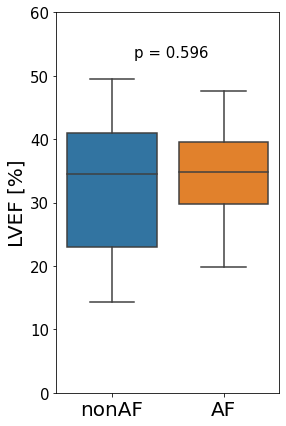

In [13]:
fig, (ax1) = plt.subplots(1,1,figsize=(4,7), facecolor='white', sharey=True)

sns.boxplot(data=[nAF_LV_EF, AF_LV_EF], orient='v')
plt.ylabel("LVEF [%]", fontsize=20)
plt.xticks(np.arange(2), ['nonAF', 'AF'], fontsize=20)
# plt.ylim(0,45)

print(stats.ttest_ind(nAF_LV_EF, AF_LV_EF))
pval = stats.ttest_ind(nAF_LV_EF, AF_LV_EF)[-1]
plt.text(0.20, 53, f'p = {str(np.round(pval,3))}', size=15)

plt.yticks(fontsize=15)
plt.ylim(0,60.0)

# plt.savefig("//home/csi20/Dropbox/phd/Documents/SAN_stanford_talk/lv_ef.png",
#            dpi=200, facecolor=fig.get_facecolor(), bbox_inches='tight')

In [14]:
nAF_LV_EF

array([34.71011652, 20.37883672, 49.40513572, 37.16208162, 25.94764398,
       27.33669615, 38.35047409, 19.9814908 , 14.27587638, 40.30716863,
       45.26133863, 47.31052604, 15.58736167, 43.13982042, 34.20750248,
       21.68166059, 35.43828113, 26.02546106, 44.06479957, 23.43062183])

In [15]:
AF_LV_EF

array([47.5189197 , 30.80619455, 19.75959995, 29.41155264, 38.1898271 ,
       35.76014523, 40.08425199, 33.87064302, 25.47208814, 42.25202219])

# LA EF

In [27]:
nAF_LA_EF = np.zeros((len(nonaf_cases),))
AF_LA_EF = np.zeros((len(af_cases),))

basePath="/media/csi20local/Seagate Portable Drive/Master/Data/RG_CT_Cases"
basePath="/home/csi20/Dropbox/phd/Data/RG_CT_Cases"
basePath="/home/csi20local/Data/RG_CT_Cases"

for i in range(0, len(nonaf_cases)):
    nAF_LA_EF[i] = np.loadtxt(f"{basePath}/{nonaf_cases[i]}/multilabel_seg_analysis/LA_EF.txt")
    
for i in range(0, len(af_cases)):
    AF_LA_EF[i] = np.loadtxt(f"{basePath}/{af_cases[i]}/multilabel_seg_analysis/LA_EF.txt")

Ttest_indResult(statistic=3.772067885857517, pvalue=0.0008062899275664676)


(0.0, 60.0)

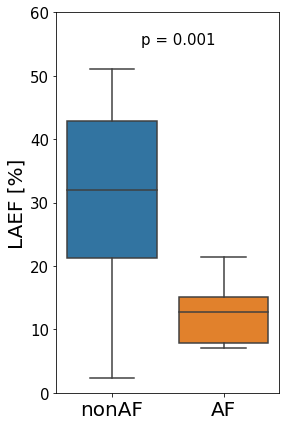

In [28]:
fig, (ax1) = plt.subplots(1,1,figsize=(4,7), facecolor='white', sharey=True)

sns.boxplot(data=[nAF_LA_EF, AF_LA_EF], orient='v')
plt.ylabel("LAEF [%]", fontsize=20)
plt.xticks(np.arange(2), ['nonAF', 'AF'], fontsize=20)
# plt.ylim(0,45)

print(stats.ttest_ind(nAF_LA_EF, AF_LA_EF))
pval = stats.ttest_ind(nAF_LA_EF, AF_LA_EF)[-1]
plt.text(0.26, 55, f'p = {str(np.round(pval,3))}', size=15)

plt.yticks(fontsize=15)
plt.ylim(0.0, 60)
# plt.savefig("/home/csi20/Dropbox/phd/Documents/SAN_stanford_talk/la_ef.png",
#            dpi=200, facecolor=fig.get_facecolor(), bbox_inches='tight')

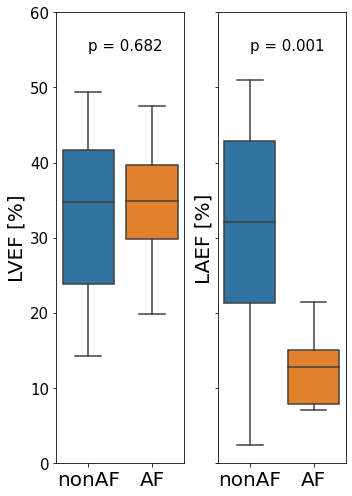

In [59]:
## FINISH ME
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(5,7), facecolor='white', sharey=True)

sns.boxplot(data=[nAF_LV_EF, AF_LV_EF], orient='v', ax=ax1)
sns.boxplot(data=[nAF_LA_EF, AF_LA_EF], orient='v', ax=ax2)

ax1.set_ylabel("LVEF [%]", fontsize=20)
ax2.set_ylabel("LAEF [%]", fontsize=20)
ax1.set_xticks(np.arange(2))
ax2.set_xticks(np.arange(2))

ax1.set_xticklabels(['nonAF', 'AF'], fontsize=20)
ax2.set_xticklabels(['nonAF', 'AF'], fontsize=20)
ax1.tick_params(axis='y', which='major', labelsize=15)

## p values

pval1 = stats.ttest_ind(nAF_LV_EF, AF_LV_EF)[-1]
ax1.text(0, 55, f'p = {str(np.round(pval1,3))}', size=15)

pval2 = stats.ttest_ind(nAF_LA_EF, AF_LA_EF)[-1]
ax2.text(0, 55, f'p = {str(np.round(pval2,3))}', size=15)

# ax1.yticks(fontsize=15)
# ax1.set_ylim(0.0, 60)
ax2.set_ylim(0.0, 60)

# plt.tight_layout()
plt.tight_layout()

# plt.savefig("/home/csi20local/Dropbox/phd/Documents/SAN_stanford_talk/la_lv_ef.png",
#            dpi=200, facecolor=fig.get_facecolor(), bbox_inches='tight')

# LA ED Volume

In [30]:
nonaf_cases_alt

['CT-CRT/case01',
 'CT-CRT/case02',
 'CT-CRT/case05',
 'CT-CRT/case06',
 'CT-CRT/case08',
 'CT-CRT/case09',
 'CT-CRT/case12',
 'CT-CRT/case14',
 'CT-CRT/case15',
 'CT-CRT/case16',
 'CT-CRT/case17',
 'CT-CRT/case18',
 'CT-CRT/case24',
 'CT-CRT/case28',
 'CT-CRT/case29',
 'CT-CRT/case30']

In [32]:
nAF_LA_vol = np.zeros((len(nonaf_cases),))
AF_LA_vol = np.zeros((len(af_cases),))

basePath="/media/csi20local/Seagate Portable Drive/Master/Data/RG_CT_Cases"
basePath="/home/csi20/Dropbox/phd/Data/RG_CT_Cases"

nonaf_cases_alt = [a for a in nonaf_cases if a not in ["CT-CRT/case07", "CT-CRT/case27", "CT-CRT/case32"]]
af_cases_alt = [a for a in af_cases if a not in ["CT-CRT/case10", "EBR/case02"]]

for i in range(0, len(nonaf_cases_alt)):
    nAF_LA_vol[i] = np.loadtxt(f"{basePath}/{nonaf_cases_alt[i]}/multilabel_seg_analysis/la_volumes.txt")[0]
    
for i in range(0, len(af_cases_alt)):
    AF_LA_vol[i] = np.loadtxt(f"{basePath}/{af_cases_alt[i]}/multilabel_seg_analysis/la_volumes.txt")[0]

In [34]:
nAF_LA_vol

array([113.0252409 , 123.11901521,  58.76441069,  43.06444671,
       135.00148667, 129.49272678, 117.87286138, 142.9745158 ,
        59.74418503,  69.18637305,  79.00631606, 119.61238132,
        77.26941488, 127.16264877,  74.21955156,  91.56072922,
         0.        ,   0.        ,   0.        ])

In [38]:
nAF_LA_vol[-3] = np.loadtxt(f"{basePath}/CT-CRT/case07/multilabel_seg_analysis/LA_t0_volume.txt")
nAF_LA_vol[-2] = np.loadtxt(f"{basePath}/CT-CRT/case27/multilabel_seg_analysis/la_ed_volume.txt")
nAF_LA_vol[-1] = np.loadtxt(f"{basePath}/CT-CRT/case32/multilabel_seg_analysis/LA_t0_volume.txt")

AF_LA_vol[-2] = np.loadtxt(f"{basePath}/CT-CRT/case10/multilabel_seg_analysis/LA_t0_volume.txt")
AF_LA_vol[-1] = np.loadtxt(f"{basePath}/EBR/case02/multilabel_seg_analysis/LA_t0_volume.txt")

Ttest_indResult(statistic=-3.459168579233727, pvalue=0.0018140166209256359)


Text(0.28, 190, 'p = 0.002')

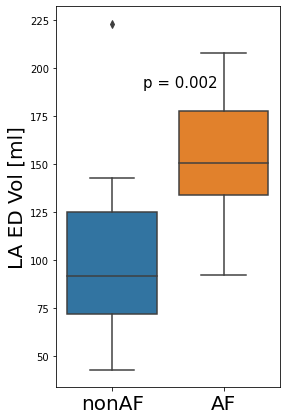

In [39]:
fig, (ax1) = plt.subplots(1,1,figsize=(4,7), facecolor='white', sharey=True)

sns.boxplot(data=[nAF_LA_vol, AF_LA_vol], orient='v')
plt.ylabel("LA ED Vol [ml]", fontsize=20)
plt.xticks(np.arange(2), ['nonAF', 'AF'], fontsize=20)
# plt.ylim(0,45)

print(stats.ttest_ind(nAF_LA_vol, AF_LA_vol))
pval = stats.ttest_ind(nAF_LA_vol, AF_LA_vol)[-1]
plt.text(0.28, 190, f'p = {str(np.round(pval,3))}', size=15)

## NOT SAVED!
# plt.savefig("/home/csi20local/Dropbox/phd/Documents/HC_analysis/global/nonAF_AF/30_cases/area_strain_boxplot_excl_PVs",
#            dpi=200, facecolor=fig.get_facecolor(), bbox_inches='tight')

# LV ED Volume

In [40]:
nAF_LV_vol = np.zeros((len(nonaf_cases),))
AF_LV_vol = np.zeros((len(af_cases),))

basePath="/media/csi20local/Seagate Portable Drive/Master/Data/RG_CT_Cases"
basePath="/home/csi20/Dropbox/phd/Data/RG_CT_Cases"

for i in range(0, len(nonaf_cases_alt)):
    nAF_LV_vol[i] = np.loadtxt(f"{basePath}/{nonaf_cases_alt[i]}/multilabel_seg_analysis/lv_volumes.txt")[0]
    
for i in range(0, len(af_cases_alt)):
    AF_LV_vol[i] = np.loadtxt(f"{basePath}/{af_cases_alt[i]}/multilabel_seg_analysis/lv_volumes.txt")[0]

In [41]:
nAF_LV_vol[-3] = np.loadtxt(f"{basePath}/CT-CRT/case07/multilabel_seg_analysis/LV_t0_volume.txt")
nAF_LV_vol[-2] = np.loadtxt(f"{basePath}/CT-CRT/case27/multilabel_seg_analysis/lv_ed_volume.txt")
nAF_LV_vol[-1] = np.loadtxt(f"{basePath}/CT-CRT/case32/multilabel_seg_analysis/LV_t0_volume.txt")

AF_LV_vol[-2] = np.loadtxt(f"{basePath}/CT-CRT/case10/multilabel_seg_analysis/LV_t0_volume.txt")
AF_LV_vol[-1] = np.loadtxt(f"{basePath}/EBR/case02/multilabel_seg_analysis/LV_t0_volume.txt")

Ttest_indResult(statistic=0.5704057774371488, pvalue=0.5731192681335173)


Text(0.28, 400, 'p = 0.573')

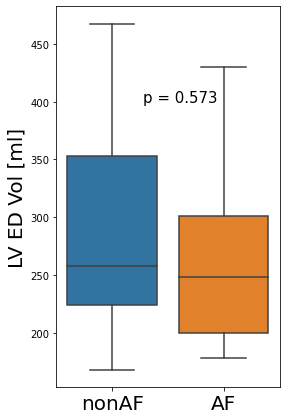

In [42]:
fig, (ax1) = plt.subplots(1,1,figsize=(4,7), facecolor='white', sharey=True)

sns.boxplot(data=[nAF_LV_vol, AF_LV_vol], orient='v')
plt.ylabel("LV ED Vol [ml]", fontsize=20)
plt.xticks(np.arange(2), ['nonAF', 'AF'], fontsize=20)
# plt.ylim(0,45)

print(stats.ttest_ind(nAF_LV_vol, AF_LV_vol))
pval = stats.ttest_ind(nAF_LV_vol, AF_LV_vol)[-1]
plt.text(0.28, 400, f'p = {str(np.round(pval,3))}', size=15)

## NOT SAVED!!
# plt.savefig("/home/csi20local/Dropbox/phd/Documents/HC_analysis/global/nonAF_AF/30_cases/area_strain_boxplot_excl_PVs",
#            dpi=200, facecolor=fig.get_facecolor(), bbox_inches='tight')